# Pymaceuticals Inc.
---

### Analysis

- Looking into how different treatments affect tumor size in this study, it seems like some treatments, like Capomulin, might be better at shrinking tumors compared to others.

I checked if mouse weight had any impact on tumor size and it looks like there may be a connection – heavier mice tend to have slightly bigger tumors.

Progress was tracked of one mouse over time to see how the treatment was working. It's interesting to see how their tumor size changes over the course of treatment.

Based on these results, it looks like some treatments are more effective than others, and weight might play a role in tumor growth.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
display(merged_data.head())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice = duplicate_rows['Mouse ID'].unique()

print("Duplicate Mice by ID number:")
print(duplicate_mice)

Duplicate Mice by ID number:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)]

print("Data for Duplicate Mouse IDs:")
display(duplicate_mouse_data)

Data for Duplicate Mouse IDs:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print("Number of mice in the clean DataFrame:", num_mice_cleaned)

Number of mice in the clean DataFrame: 249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

print("Summary Statistics of Tumor Volume for Each Drug Regimen:")
display(summary_statistics)


Summary Statistics of Tumor Volume for Each Drug Regimen:


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    SEM='sem'
)

print("Summary Statistics of Tumor Volume for Each Drug Regimen (Advanced):")
display(summary_statistics_advanced)

Summary Statistics of Tumor Volume for Each Drug Regimen (Advanced):


,mean,median,variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

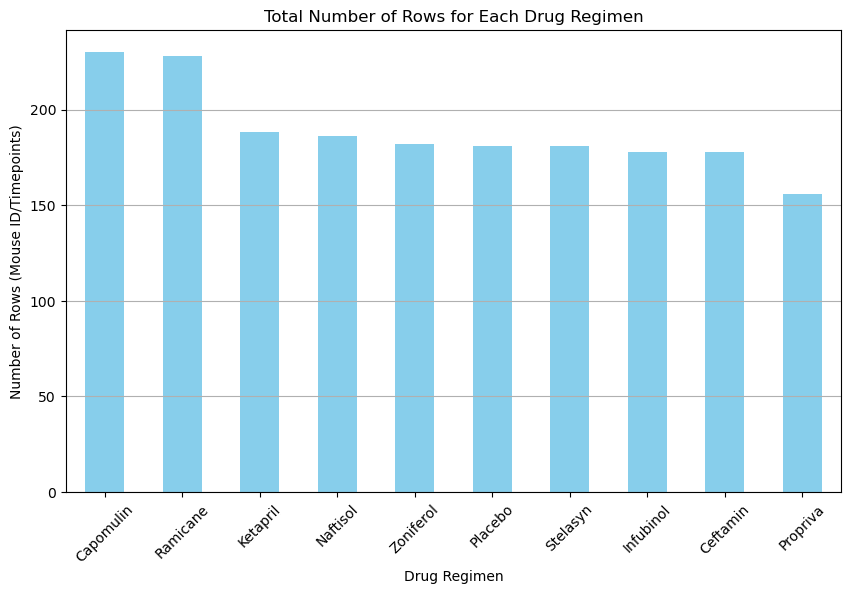

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

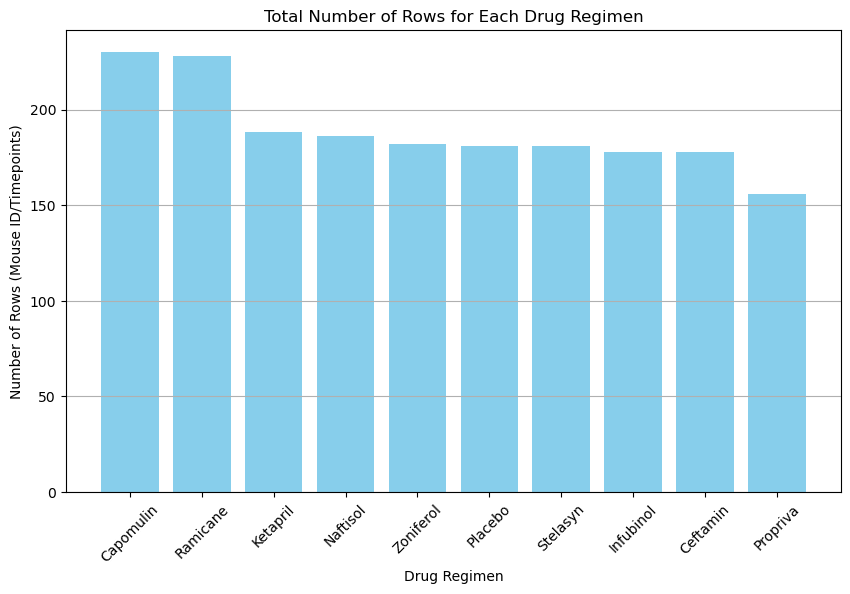

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

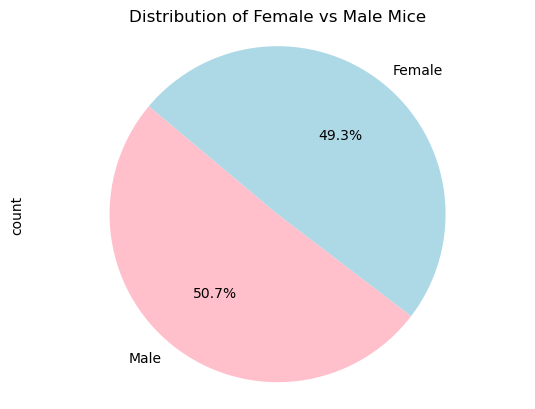

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'lightblue'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

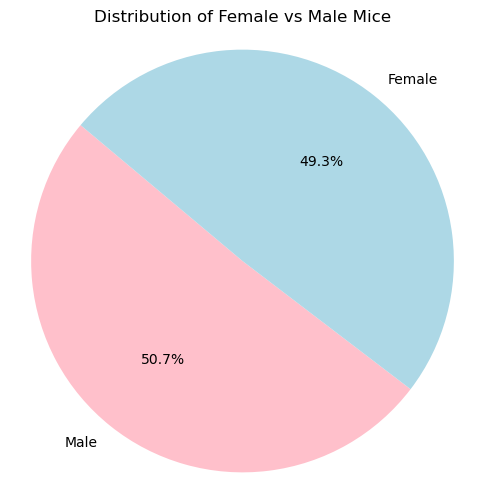

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = cleaned_data['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'lightblue'])
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_timepoint_per_mouse = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume = pd.merge(max_timepoint_per_mouse, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(selected_regimens)]

print("Final Tumor Volume of Each Mouse for Selected Treatment Regimens:")
display(final_tumor_volume.head())

Final Tumor Volume of Each Mouse for Selected Treatment Regimens:


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_data = []

for treatment in treatments:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    print(f"Potential outliers for {treatment}:")
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if outliers.empty:
        print("No outliers found")
    else:
        print(outliers)
    print("---------------------------")



Potential outliers for Capomulin:
No outliers found
---------------------------
Potential outliers for Ramicane:
No outliers found
---------------------------
Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
---------------------------
Potential outliers for Ceftamin:
No outliers found
---------------------------


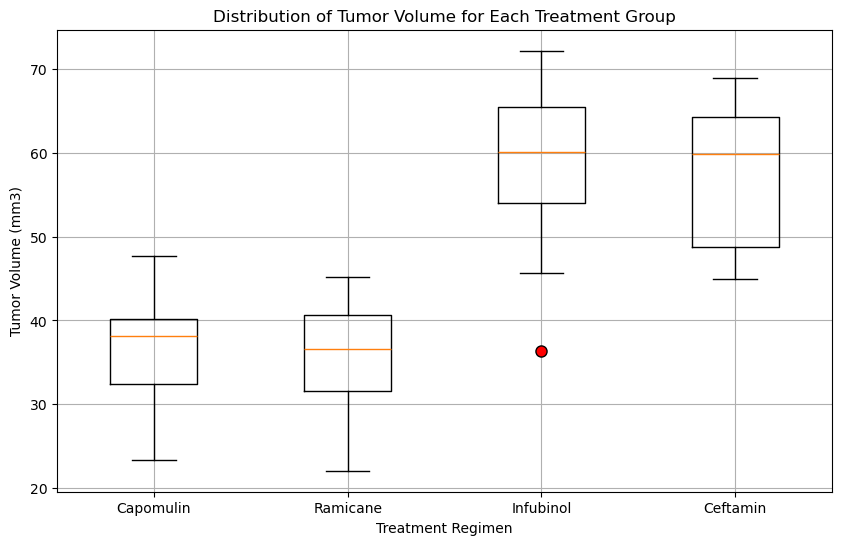

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Line and Scatter Plots

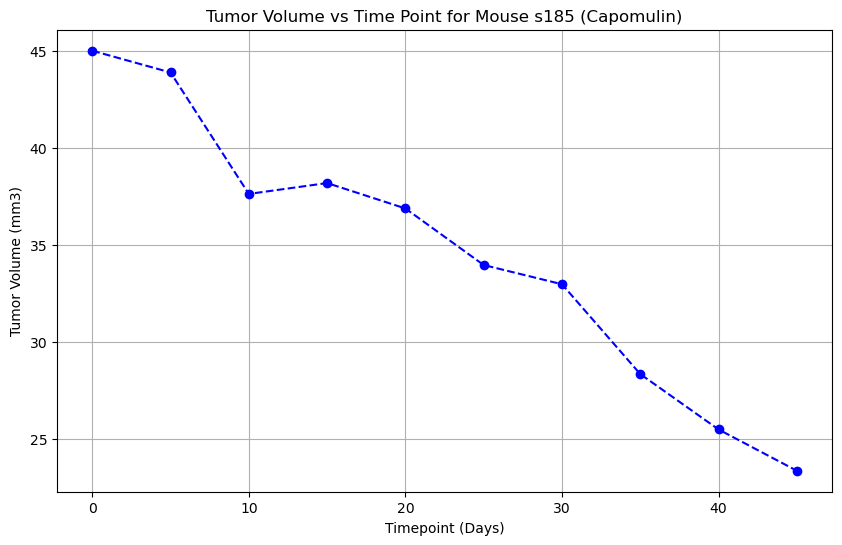

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

mouse_id = capomulin_data['Mouse ID'].iloc[0]

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='--')
plt.title(f'Tumor Volume vs Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

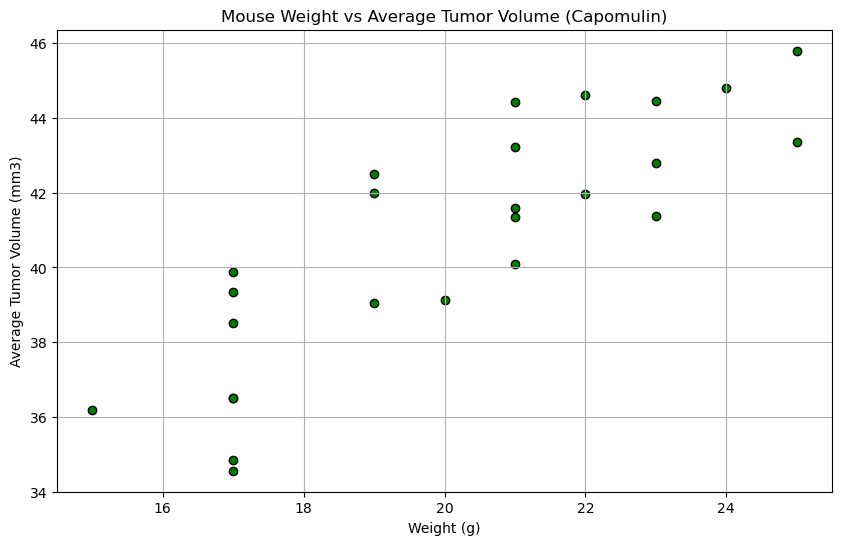

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_grouped = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')
)

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped['Mouse_Weight'], capomulin_grouped['Average_Tumor_Volume'], color='green', edgecolors='black')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472
Linear Regression Model:
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


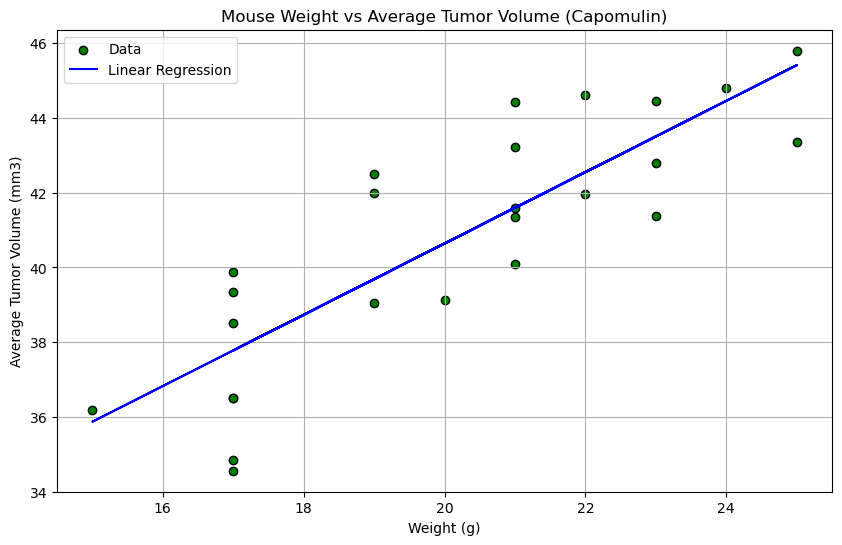

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient, _ = pearsonr(capomulin_grouped['Mouse_Weight'], capomulin_grouped['Average_Tumor_Volume'])
print("Correlation Coefficient:", correlation_coefficient)

slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Mouse_Weight'], capomulin_grouped['Average_Tumor_Volume'])
print("Linear Regression Model:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped['Mouse_Weight'], capomulin_grouped['Average_Tumor_Volume'], color='green', edgecolors='black', label='Data')
plt.plot(capomulin_grouped['Mouse_Weight'], slope * capomulin_grouped['Mouse_Weight'] + intercept, color='blue', label='Linear Regression')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()